In [1]:
!pip install -U 'git+https://github.com/facebookresearch/fvcore'

  Cloning https://github.com/facebookresearch/fvcore to /tmp/pip-req-build-xmyyfliy
  Running command git clone -q https://github.com/facebookresearch/fvcore /tmp/pip-req-build-xmyyfliy
     |████████████████████████████████| 276kB 6.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1-cp36-none-any.whl size=44898 sha256=c4d639050ee8ab8575df437c011c383e9c4f3c73ca52858fafafcdede0f49756
  Stored in directory: /tmp/pip-ephem-wheel-cache-telv7k1m/wheels/04/a4/85/e50340018c00ae6e07e891fed78895891da33700e90a68aa05
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=10740a767537f32768826ebc3657e374ba8b45639b34c5ea7ba0f43fdb6faa0d
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built fvcore pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!git clone https://github.com/facebookresearch/detectron2.git
#!git clone https://github.com/Espadan/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 5071, done.
remote: Total 5071 (delta 0), reused 0 (delta 0), pack-reused 5071
Receiving objects: 100% (5071/5071), 2.45 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (3636/3636), done.


In [3]:
# install dependencies: (use cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 35.0MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 276kB 4.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=07cae59306b36d0f81109d8ce996852def2c6597586846f1d262d9e434141835
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 5.3.1
    Uninstalling PyYAML-5.3.1:
      Successfully uninstalled PyYAML-5.3.1


In [4]:
!cd detectron2 && python -m pip install -e .

Obtaining file:///content/detectron2
  Running setup.py develop for detectron2


In [0]:
!mv detectron2 detectron2_mv
!cp -r /content/detectron2_mv/* /content/
!rm -r detectron2_mv

In [34]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [0]:
# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random

In [0]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


--2020-05-26 18:01:52--  https://sun9-35.userapi.com/c639422/v639422871/2e904/f5EdGwY9lcI.jpg
Resolving sun9-35.userapi.com (sun9-35.userapi.com)... 93.186.227.146
Connecting to sun9-35.userapi.com (sun9-35.userapi.com)|93.186.227.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76483 (75K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  74.69K  --.-KB/s    in 0.07s   

2020-05-26 18:01:52 (1.10 MB/s) - ‘input.jpg’ saved [76483/76483]



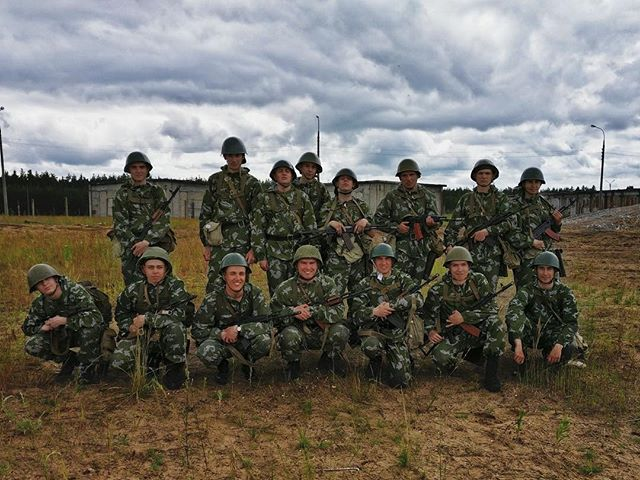

In [10]:
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
!wget https://sun9-35.userapi.com/c639422/v639422871/2e904/f5EdGwY9lcI.jpg -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [11]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file("configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:19, 9.17MB/s]                           


In [0]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes

In [0]:
outputs["instances"].pred_boxes

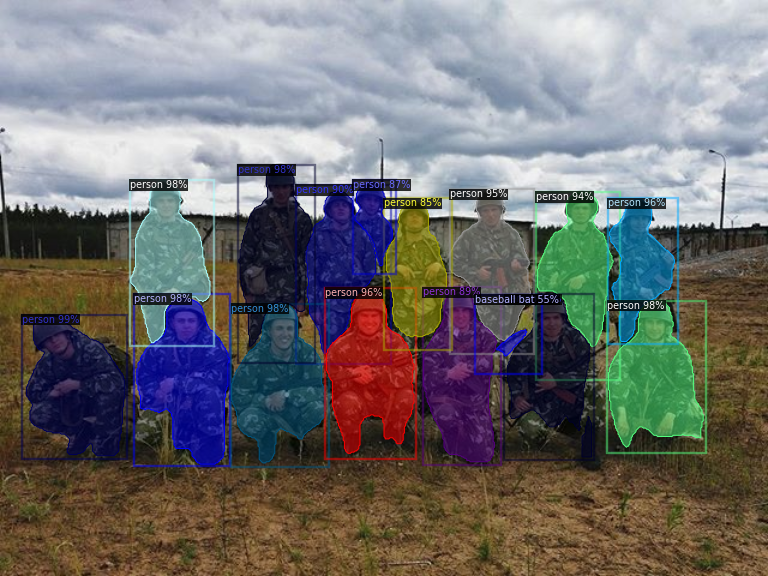

In [12]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

model_final_a6e10b.pkl: 237MB [00:40, 5.89MB/s]                           


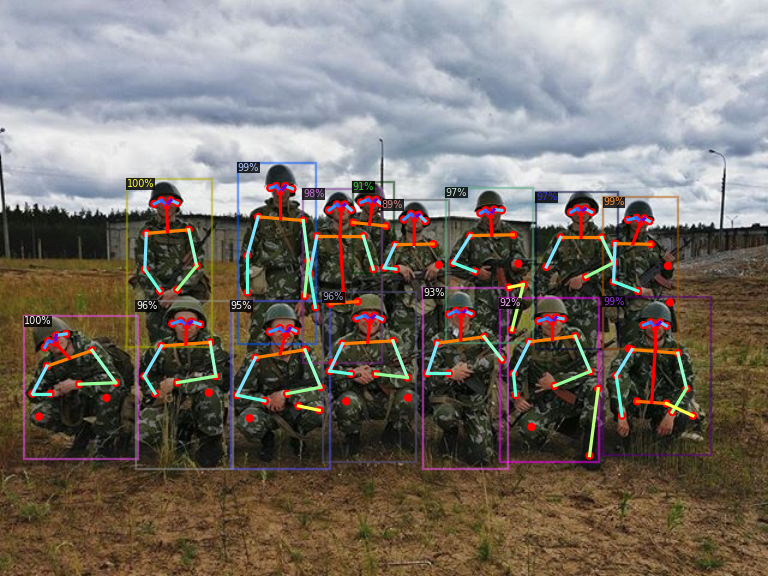

In [13]:
# Inference with a keypoint detection model
cfg = get_cfg()
#cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file("configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

model_final_cafdb1.pkl: 261MB [00:27, 9.44MB/s]                           


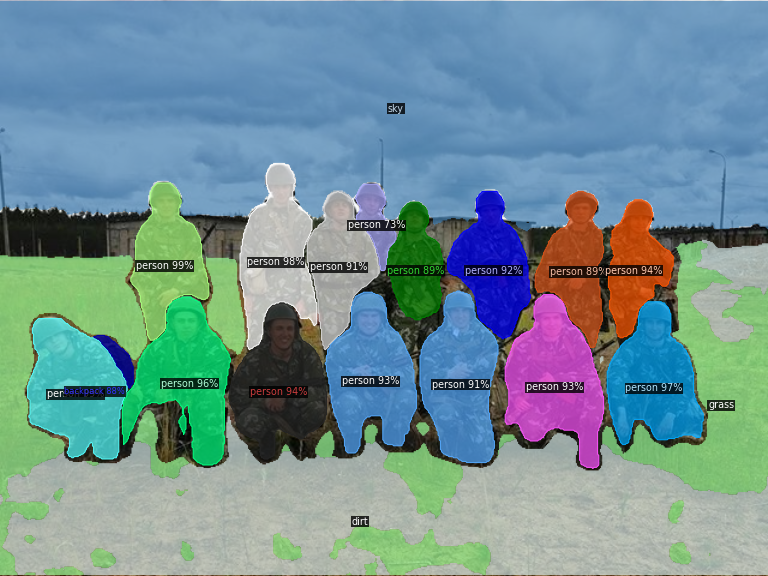

In [14]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file("configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

In [37]:
keypoint_names = ["LeftBrowLeftCorner", "LeftBrowCenter", "LeftBrowRightCorner", "RightBrowLeftCorner", "RightBrowCenter",
                  "RightBrowRightCorner", "LeftEyeLeftCorner", "LeftEyeCenter", "LeftEyeRightCorner", "RightEyeLeftCorner", "RightEyeCenter",
                  "RightEyeRightCorner", "LeftEar", "NoseLeft", "NoseCenter", "NoseRight", "RightEar", "MouthLeftCorner", "MouthCenter",
                  "MouthRightCorner", "ChinCenter"]
keypoint_flip_map = [("LeftBrowLeftCorner", "RightBrowRightCorner"),("LeftBrowRightCorner", "RightBrowLeftCorner"),("LeftBrowCenter","RightBrowCenter"),
                     ("LeftEyeLeftCorner", "RightEyeRightCorner"), ("LeftEyeRightCorner","RightEyeLeftCorner"), ("LeftEyeCenter","RightEyeCenter"),
                     ("LeftEar", "RightEar"), ("NoseLeft", "NoseRight"), ("MouthLeftCorner", "MouthRightCorner")]
type(keypoint_flip_map)

list

In [0]:
from detectron2.data.datasets import register_coco_instances
name_coco_face = "face_land_0"
register_coco_instances(name_coco_face, {}, "./drive/My Drive/data/aflw_annotations.json", "./drive/My Drive/data/")

In [39]:
face_land_metadata = MetadataCatalog.get(name_coco_face)
MetadataCatalog.get(name_coco_face).keypoint_names = keypoint_names
MetadataCatalog.get(name_coco_face).keypoint_flip_map = keypoint_flip_map
dataset_dicts = DatasetCatalog.get(name_coco_face)
print(face_land_metadata)

[05/28 18:59:58 d2.data.datasets.coco]: Loading ./drive/My Drive/data/aflw_annotations.json takes 1.59 seconds.
WARNING [05/28 18:59:58 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/28 18:59:58 d2.data.datasets.coco]: Loaded 21121 images in COCO format from ./drive/My Drive/data/aflw_annotations.json
Metadata(evaluator_type='coco', image_root='./drive/My Drive/data/', json_file='./drive/My Drive/data/aflw_annotations.json', keypoint_flip_map=[('LeftBrowLeftCorner', 'RightBrowRightCorner'), ('LeftBrowRightCorner', 'RightBrowLeftCorner'), ('LeftBrowCenter', 'RightBrowCenter'), ('LeftEyeLeftCorner', 'RightEyeRightCorner'), ('LeftEyeRightCorner', 'RightEyeLeftCorner'), ('LeftEyeCenter', 'RightEyeCenter'), ('LeftEar', 'RightEar'), ('NoseLeft', 'NoseRight'), ('MouthLeftCorner', 'MouthRightCorner')], keypoint_names=['LeftBrowLeftCorner', 'LeftBrowCenter', 'LeftBrowRightCorner', 'RightBrowLeftCorner', 'RightBrowCenter', 'R

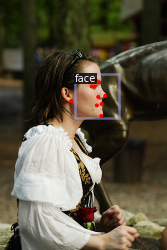

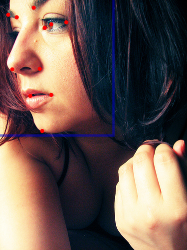

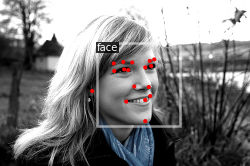

In [19]:
import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=face_land_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [0]:
!export CUDA_LAUNCH_BLOCKING=1

In [0]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [0]:
#!mkdir ./output
!cp ./drive/My\ Drive/data/KP_model_final_4000step.pth ./output/model_final.pth

In [0]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = (name_coco_face,)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.MAX_ITER = 4000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (face). def=80
cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 21 # def=17

In [42]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[05/28 19:04:25 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Unable to load 'roi_heads.keypoint_head.score_lowres.weight' to the model due to incompatible shapes: (512, 17, 4, 4) in the checkpoint but (512, 21, 4, 4) in the model!
Unable to load 'roi_heads.keypoint_head.score_lowres.bias' to the model due to incompatible shapes: (17,) in the checkpoint but (21,) in the model!


[05/28 19:04:27 d2.engine.train_loop]: Starting training from iteration 0
[05/28 19:04:57 d2.utils.events]:  eta: 0:08:58  iter: 19  total_loss: 10.286  loss_cls: 1.274  loss_box_reg: 0.870  loss_keypoint: 8.067  loss_rpn_cls: 0.047  loss_rpn_loc: 0.016  time: 1.1450  data_time: 0.8461  lr: 0.000020  max_mem: 4605M
[05/28 19:05:18 d2.utils.events]:  eta: 0:09:01  iter: 39  total_loss: 9.651  loss_cls: 0.887  loss_box_reg: 0.696  loss_keypoint: 8.051  loss_rpn_cls: 0.043  loss_rpn_loc: 0.013  time: 1.1001  data_time: 0.7804  lr: 0.000040  max_mem: 4605M
[05/28 19:05:37 d2.utils.events]:  eta: 0:08:24  iter: 59  total_loss: 9.107  loss_cls: 0.357  loss_box_reg: 0.673  loss_keypoint: 8.018  loss_rpn_cls: 0.026  loss_rpn_loc: 0.011  time: 1.0402  data_time: 0.6391  lr: 0.000060  max_mem: 4605M
[05/28 19:05:56 d2.utils.events]:  eta: 0:08:12  iter: 79  total_loss: 8.805  loss_cls: 0.164  loss_box_reg: 0.608  loss_keypoint: 7.961  loss_rpn_cls: 0.008  loss_rpn_loc: 0.010  time: 1.0214  data_

In [97]:
!cp ./output/model_final.pth ./drive/My\ Drive/data/KP_model_final_3000step.pth

^C


# Prediction keypoints

In [100]:
trainer = DefaultTrainer(cfg) 
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9   # set the testing threshold for this model
cfg.DATASETS.TEST = (name_coco_face, )
predictor = DefaultPredictor(cfg)

[05/28 19:46:21 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [47]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=face_land_metadata, 
                   scale=1.2
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

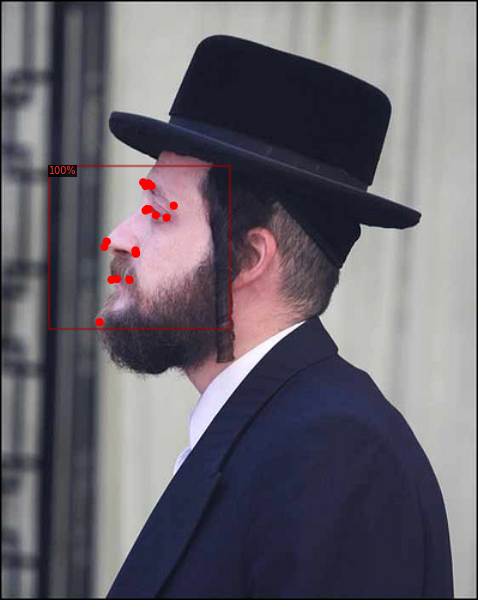

In [105]:
from detectron2.utils.visualizer import ColorMode

d = dataset_dicts[59]   
im = cv2.imread(d["file_name"])
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                metadata=face_land_metadata, 
                scale=1.2
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [0]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(name_coco_face, cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, name_coco_face)
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

#Panoptic

In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
stuff_classes = ['LeftBrowLeftCorner',
                'LeftBrowCenter',
                'LeftBrowRightCorner',
                'RightBrowLeftCorner',
                'RightBrowCenter',
                'RightBrowRightCorner',
                'LeftEyeLeftCorner',
                'LeftEyeCenter',
                'LeftEyeRightCorner',
                'RightEyeLeftCorner',
                'RightEyeCenter',
                'RightEyeRightCorner',
                'LeftEar',
                'NoseLeft',
                'NoseCenter',
                'NoseRight',
                'RightEar',
                'MouthLeftCorner',
                'MouthCenter',
                'MouthRightCorner',
                'ChinCenter'
                'Face']

In [0]:
from detectron2.data.datasets import register_coco_panoptic_separated
name_coco_dataset_panoptic = "ms-coco_panoptic_15"
register_coco_panoptic_separated(name=name_coco_dataset_panoptic, metadata={}, image_root="./drive/My Drive/data/allImagesJPG3/",
                                 panoptic_root="./drive/My Drive/data/allImagesPNG3/", panoptic_json="./drive/My Drive/data/panoptic_aflw7coco.json",
                                 sem_seg_root="./drive/My Drive/data/allImagesPNG3/", instances_json="./drive/My Drive/data/aflw_coco12.json")

In [0]:
face_land_metadata = MetadataCatalog.get(name_coco_dataset_panoptic + "_separated")
MetadataCatalog.get(name_coco_dataset_panoptic + "_separated").set(stuff_classes=stuff_classes)
dataset_dicts = DatasetCatalog.get(name_coco_dataset_panoptic + "_separated")
print(face_land_metadata)

In [0]:
dataset_dicts2 = DatasetCatalog.get(name_coco_dataset_panoptic + "_stuffonly")

In [0]:
dataset_dicts[4]

In [0]:

d = dataset_dicts[8]
d.pop('sem_seg_file_name')
img = cv2.imread(d["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=face_land_metadata, scale=0.5)
vis = visualizer.draw_dataset_dict(d)
cv2_imshow(vis.get_image()[:, :, ::-1])

In [0]:
for d in random.sample(dataset_dicts, 5):
    d.pop('sem_seg_file_name')
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=face_land_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [0]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
#cfg.merge_from_file("configs/COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")
cfg.DATASETS.TRAIN = (name_coco_dataset_panoptic + "_separated",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 200  #
#cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 54
cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 200

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1   # set the testing threshold for this model
cfg.DATASETS.TEST = (name_coco_dataset_panoptic + "_separated", )
predictor = DefaultPredictor(cfg)

In [0]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=face_land_metadata, 
                   scale=1.2
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    cv2_imshow(v.get_image()[:, :, ::-1])

In [0]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=face_land_metadata, 
                   scale=1.2
    )
    #v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    v = v.draw_

    cv2_imshow(v.get_image()[:, :, ::-1])

In [0]:
COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml
COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml

In [0]:
#cfg = get_cfg()
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1   # set the testing threshold for this model
#cfg.DATASETS.TEST = ("mapillary-panoptic-validation", )
cfg.DATASETS.TEST = (name_coco_dataset_panoptic + "_separated", )
predictor = DefaultPredictor(cfg)
# from detectron2.utils.visualizer import ColorMode
# dataset_dicts = get_balloon_dicts("balloon/val")
# for d in random.sample(dataset_dicts, 3):
root_dir = '/media/AjetoNetworking/tmp/isagastiberri/prueba/imgs'
mapillary_metadata = MetadataCatalog.get("mapillary-panoptic-validation_separated")
#for root, _, files in os.walk(root_dir):
for d in random.sample(dataset_dicts, 3):
    #for img_name in files:
    # im = cv2.imread(os.path.join(root_dir, img_name))
    #im = read_image(os.path.join(root_dir, img_name), format="BGR")
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                metadata=mapillary_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.IMAGE
        )
    print(outputs)
    panoptic_seg, segments_info = outputs["panoptic_seg"]
    v = v.draw_panoptic_seg_predictions(
            panoptic_seg.to('cpu'), segments_info
        )
    cv2_imshow(v.get_image()[:, :, ::-1])

#Panoptic#2


In [0]:
stuff_classes = ['LeftBrowLeftCorner',
                'LeftBrowCenter',
                'LeftBrowRightCorner',
                'RightBrowLeftCorner',
                'RightBrowCenter',
                'RightBrowRightCorner',
                'LeftEyeLeftCorner',
                'LeftEyeCenter',
                'LeftEyeRightCorner',
                'RightEyeLeftCorner',
                'RightEyeCenter',
                'RightEyeRightCorner',
                'LeftEar',
                'NoseLeft',
                'NoseCenter',
                'NoseRight',
                'RightEar',
                'MouthLeftCorner',
                'MouthCenter',
                'MouthRightCorner',
                'ChinCenter'
                'Face']

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

In [0]:
from detectron2.data.datasets import register_coco_panoptic_separated
name_coco_dataset_panoptic = "ms-coco_panoptic_0"
register_coco_panoptic_separated(name=name_coco_dataset_panoptic, metadata={}, image_root="./drive/My Drive/data/allImagesJPG3/",
                                 panoptic_root="./drive/My Drive/data/allImagesPNG3/", panoptic_json="./drive/My Drive/data/panoptic_aflw7coco.json",
                                 sem_seg_root="./drive/My Drive/data/allImagesPNG3/", instances_json="./drive/My Drive/data/aflw_coco12.json")

In [13]:
face_land_metadata = MetadataCatalog.get(name_coco_dataset_panoptic + "_separated")
MetadataCatalog.get(name_coco_dataset_panoptic + "_separated").set(stuff_classes=stuff_classes)
dataset_dicts = DatasetCatalog.get(name_coco_dataset_panoptic + "_separated")
print(face_land_metadata)

[05/30 07:13:59 d2.data.datasets.coco]: Loading ./drive/My Drive/data/aflw_coco12.json takes 1.02 seconds.
[05/30 07:13:59 d2.data.datasets.coco]: Loaded 9233 images in COCO format from ./drive/My Drive/data/aflw_coco12.json
WARNING [05/30 07:14:00 d2.data.datasets.coco]: Directory ./drive/My Drive/data/allImagesJPG3/ and ./drive/My Drive/data/allImagesPNG3/ has 9285 and 9243 files, respectively.
WARNING [05/30 07:14:00 d2.data.datasets.coco]: Will use their intersection of 9233 files.
[05/30 07:14:00 d2.data.datasets.coco]: Loaded 9233 images with semantic segmentation from ./drive/My Drive/data/allImagesJPG3/
Metadata(evaluator_type='coco_panoptic_seg', image_root='./drive/My Drive/data/allImagesJPG3/', json_file='./drive/My Drive/data/aflw_coco12.json', name='ms-coco_panoptic_0_separated', panoptic_json='./drive/My Drive/data/panoptic_aflw7coco.json', panoptic_root='./drive/My Drive/data/allImagesPNG3/', sem_seg_root='./drive/My Drive/data/allImagesPNG3/', stuff_classes=['LeftBrowLe

###Draw

In [14]:
for d in random.sample(dataset_dicts, 5):
    d.pop('sem_seg_file_name')
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=face_land_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

###Train

In [0]:
cfg = get_cfg()
cfg.merge_from_file("configs/COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")
cfg.DATASETS.TRAIN = (name_coco_dataset_panoptic + "_separated",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 21+1  #200
cfg.TEST.DETECTIONS_PER_IMAGE = 100
#cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 54
#cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 200

In [33]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[05/28 08:23:04 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


[05/28 08:52:26 d2.utils.events]:  eta: 0:00:47  iter: 2839  total_loss: 0.486  loss_rpn_cls: 0.082  loss_rpn_loc: 0.393  time: 0.6180  data_time: 0.4805  lr: 0.001000  max_mem: 3089M
[05/28 08:52:42 d2.utils.events]:  eta: 0:00:42  iter: 2859  total_loss: 0.532  loss_rpn_cls: 0.079  loss_rpn_loc: 0.407  time: 0.6194  data_time: 0.6444  lr: 0.001000  max_mem: 3089M
[05/28 08:52:55 d2.utils.events]:  eta: 0:00:35  iter: 2879  total_loss: 0.506  loss_rpn_cls: 0.072  loss_rpn_loc: 0.390  time: 0.6197  data_time: 0.4829  lr: 0.001000  max_mem: 3089M
[05/28 08:53:08 d2.utils.events]:  eta: 0:00:30  iter: 2899  total_loss: 1.247  loss_rpn_cls: 0.091  loss_rpn_loc: 1.172  time: 0.6198  data_time: 0.4525  lr: 0.001000  max_mem: 3089M
[05/28 08:53:22 d2.utils.events]:  eta: 0:00:24  iter: 2919  total_loss: 0.509  loss_rpn_cls: 0.086  loss_rpn_loc: 0.432  time: 0.6204  data_time: 0.5267  lr: 0.001000  max_mem: 3089M
[05/28 08:53:37 d2.utils.events]:  eta: 0:00:18  iter: 2939  total_loss: 0.571  

In [0]:
!cp ./output/model_final.pth ./drive/My\ Drive/data/SSD_model_final_3000step.pth

###Predict

In [0]:
!mkdir ./output
!cp ./drive/My\ Drive/data/RCNN_model_final_3000step.pth ./output/model_final.pth 

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.01   # set the testing threshold for this model
cfg.DATASETS.TEST = (name_coco_dataset_panoptic + "_separated", )
predictor = DefaultPredictor(cfg)

In [27]:
d = dataset_dicts[0]    
im = cv2.imread(d["file_name"])
outputs = predictor(im)

out = outputs["instances"]
print(len(out.get("proposal_boxes")))
print(len(out.get("objectness_logits")))
print(out.get_fields())


1000
1000
{'proposal_boxes': Boxes(tensor([[  0.0000,  20.5086, 453.0000, 387.0504],
        [275.2944, 170.2317, 278.6683, 173.5282],
        [275.6610, 170.4724, 279.1473, 174.0629],
        ...,
        [ 92.1423,  61.0122, 287.9522, 241.7842],
        [110.8332, 347.6566, 285.6038, 489.6601],
        [  0.0000, 129.6486, 196.6850, 500.0000]], device='cuda:0')), 'objectness_logits': tensor([8.4150, 8.1751, 8.1142, 7.9493, 7.8155, 7.7323, 7.6923, 7.6733, 7.6339,
        7.5180, 7.3849, 7.3482, 7.3203, 7.3134, 7.2881, 7.2643, 7.2166, 7.1715,
        7.1644, 7.1476, 7.1099, 7.0988, 6.9902, 6.9764, 6.9523, 6.9191, 6.9157,
        6.9155, 6.9125, 6.9115, 6.9036, 6.8890, 6.8879, 6.8852, 6.8589, 6.8583,
        6.8470, 6.8165, 6.7935, 6.7806, 6.7449, 6.7434, 6.7297, 6.7247, 6.7215,
        6.7114, 6.7085, 6.6993, 6.6576, 6.6524, 6.6518, 6.6492, 6.6490, 6.6344,
        6.6342, 6.6331, 6.6262, 6.6227, 6.6196, 6.6162, 6.5980, 6.5949, 6.5913,
        6.5893, 6.5832, 6.5775, 6.5738, 6.5720, 6.5

In [23]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=face_land_metadata, 
                   scale=1.2
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    cv2_imshow(v.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

In [0]:
!cp ./output/model_final.pth ./drive/My\ Drive/data/model_final_2000step_300pred.pth

300
{'pred_boxes': Boxes(tensor([[ 93.5587,  92.8933, 360.3796, 357.8607]], device='cuda:0')), 'scores': tensor([0.9886], device='cuda:0'), 'pred_classes': tensor([21], device='cuda:0'), 'pred_masks': tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')}
Bbox: Boxes(tensor([[ 93.5587,  92.8933, 360.3796, 357.8607]], device='cuda:0'))
Class tensor([21], device='cuda:0')
Score: tensor([0.9886], device='cuda:0')


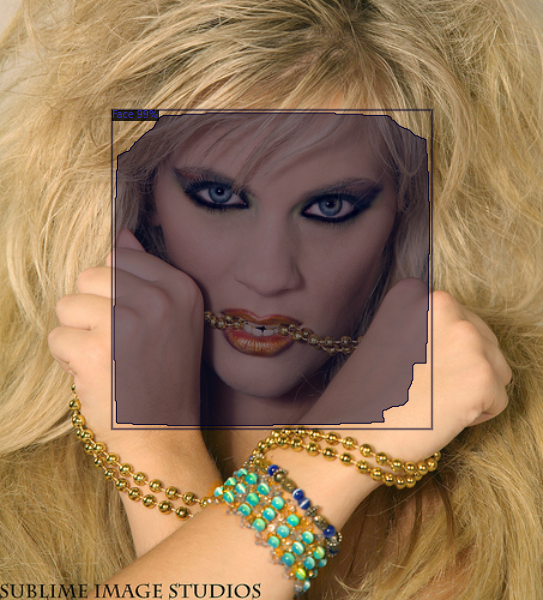

In [29]:
d = dataset_dicts[0]
im = cv2.imread(d["file_name"])
outputs = predictor(im)
inst = outputs["instances"][0]
print(len(outputs["instances"]))
print(inst.get_fields())
print("Bbox:",inst.get("pred_boxes"))
print("Class", inst.get("pred_classes"))
print("Score:",inst.get("scores"))
#print(outputs["instances"][1])
v = Visualizer(im[:, :, ::-1],metadata=face_land_metadata,scale=1.2)
v = v.draw_instance_predictions(outputs["instances"][0].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [31]:
d = dataset_dicts[0]
im = cv2.imread(d["file_name"])
outputs = predictor(im)

list_bestInst = [None] * 22
list_bestScore = [0] * 22


for i in range(0, len(outputs["instances"])):
  #print(i)
  one_inst = outputs["instances"][i]
  id_class = one_inst.get("pred_classes")
  #print(int(id_class))
  score = one_inst.get("scores")
  #print(score)
  if score > list_bestScore[id_class]:
    list_bestInst[id_class] = one_inst
    list_bestScore[id_class] = score

for inst in list_bestInst:
  if inst:
    v = Visualizer(im[:, :, ::-1],metadata=face_land_metadata,scale=1.2)
    #v = v.draw_instance_predictions(list_bestInst.to("cpu"))
    v = v.draw_instance_predictions(inst.to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

#Metrics

In [0]:
for d in random.sample(dataset_dicts, 5):
    d.pop('sem_seg_file_name')
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=face_land_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [0]:
d = dataset_dicts[0]
im = cv2.imread(d["file_name"])
outputs = predictor(im)

list_bestInst = [None] * 22
list_bestScore = [0] * 22


for i in range(0, len(outputs["instances"])):
  #print(i)
  one_inst = outputs["instances"][i]
  id_class = one_inst.get("pred_classes")
  #print(int(id_class))
  score = one_inst.get("scores")
  #print(score)
  if score > list_bestScore[id_class]:
    list_bestInst[id_class] = one_inst

for inst in list_bestInst:
  if inst:
    v = Visualizer(im[:, :, ::-1],metadata=face_land_metadata,scale=1.2)
    #v = v.draw_instance_predictions(list_bestInst.to("cpu"))
    v = v.draw_instance_predictions(inst.to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [33]:
sum_rmse_img = 0
dataset_dicts = DatasetCatalog.get(name_coco_dataset_panoptic + "_separated")
dataset_dicts = dataset_dicts[2000:2500]
print(len(dataset_dicts))
for i, one_img in enumerate(dataset_dicts):
  if not (i%50):
    print(i,"/",len(dataset_dicts))
  rmse_one_img = 0
  pts_gt = one_img["annotations"]

  d = one_img
  im = cv2.imread(d["file_name"])
  outputs = predictor(im)
  list_pred = [None] * 22
  list_bestScore = [0] * 22
  for i in range(0, len(outputs["instances"])):
    one_inst = outputs["instances"][i]
    id_class = one_inst.get("pred_classes")
    score = one_inst.get("scores")
    if score > list_bestScore[id_class]:
      if(one_inst.get("pred_boxes").tensor[0][0] > pts_gt[-1]["bbox"][0] and
         one_inst.get("pred_boxes").tensor[0][0] < pts_gt[-1]["bbox"][0]+pts_gt[-1]["bbox"][2]): #check in bbox
        if (one_inst.get("pred_boxes").tensor[0][1] > pts_gt[-1]["bbox"][1] and
            one_inst.get("pred_boxes").tensor[0][1] < pts_gt[-1]["bbox"][1]+pts_gt[-1]["bbox"][3]):
          list_pred[id_class] = one_inst
          list_bestScore[id_class] = score

  L = 21
  if(pts_gt[-1]["category_id"] == 21):
    bbox_size = pts_gt[-1]["bbox"][2]

  rmse_points = 0
  for i, pt_get in enumerate(pts_gt):
    x_gt = pt_get["bbox"][0] + 3 # bboxsize=6; 6/2=3
    y_gt = pt_get["bbox"][1] + 3
    pts_pred = list_pred[pt_get["category_id"]]
    if(pts_pred):
      bbox_pred = pts_pred.get("pred_boxes")
      x_pred = int(bbox_pred.get_centers()[0][0]) + 3
      y_pred = int(bbox_pred.get_centers()[0][1]) + 3
      rmse_points = rmse_points + (((x_pred - x_gt)**2+(y_pred - y_gt)**2)**0.5) / bbox_size

  rmse_one_img = rmse_points/L
  sum_rmse_img = sum_rmse_img + rmse_one_img
  #print(d["file_name"], rmse_one_img)
rmse = sum_rmse_img / len(dataset_dicts)
print("RMSE:", rmse)

[05/28 18:52:08 d2.data.datasets.coco]: Loading ./drive/My Drive/data/aflw_coco12.json takes 1.21 seconds.
[05/28 18:52:08 d2.data.datasets.coco]: Loaded 9233 images in COCO format from ./drive/My Drive/data/aflw_coco12.json
WARNING [05/28 18:52:09 d2.data.datasets.coco]: Directory ./drive/My Drive/data/allImagesJPG3/ and ./drive/My Drive/data/allImagesPNG3/ has 9285 and 9243 files, respectively.
WARNING [05/28 18:52:09 d2.data.datasets.coco]: Will use their intersection of 9233 files.
[05/28 18:52:09 d2.data.datasets.coco]: Loaded 9233 images with semantic segmentation from ./drive/My Drive/data/allImagesJPG3/
500
0 / 500
50 / 500
100 / 500
150 / 500
200 / 500
250 / 500
300 / 500
350 / 500
400 / 500
450 / 500
RMSE: 0.10030986409754843


In [99]:
sumP = 0
dataset_dicts = DatasetCatalog.get(name_coco_dataset_panoptic + "_separated")
dataset_dicts = dataset_dicts[2000:2500]
print(len(dataset_dicts))
for i, one_img in enumerate(dataset_dicts):
  if not (i%50):
    print(i,"/",len(dataset_dicts))
  rmse_one_img = 0
  pts_gt = one_img["annotations"]

  d = one_img
  im = cv2.imread(d["file_name"])
  outputs = predictor(im)
  inst_face = outputs["instances"][0]

  pt_get = pts_gt[-1] #face
  bbox_gt = pt_get["bbox"]

  bbox_pred = inst_face.get("pred_boxes")
  bbox_pred = bbox_pred.tensor[0]

  x1_gt = bbox_gt[0]
  x2_gt = bbox_gt[0]+bbox_gt[2]
  y1_gt = bbox_gt[1]
  y2_gt = bbox_gt[1]+bbox_gt[3]

  x1_pred = int(bbox_pred[0])
  x2_pred = int(bbox_pred[2])
  y1_pred = int(bbox_pred[1])
  y2_pred = int(bbox_pred[3])

  # determine the (x, y)-coordinates of the intersection rectangle
  xA = max(x1_gt, x1_pred)
  yA = max(y1_gt, y1_pred)
  xB = min(x2_gt, x2_pred)
  yB = min(y2_gt, y2_pred)
  # compute the area of intersection rectangle
  interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
  # compute the area of both the prediction and ground-truth
  # rectangles
  boxAArea = (x2_gt - x1_gt + 1) * (y2_gt - y1_gt + 1)
  boxBArea = (x2_pred - x1_pred + 1) * (y2_pred - y1_pred + 1)
  # compute the intersection over union by taking the intersection
  # area and dividing it by the sum of prediction + ground-truth
  # areas - the interesection area
  iou = interArea / float(boxAArea + boxBArea - interArea)
  # return the intersection over union value
  if iou > 0.75:
    sumP = sumP+1

mAP = sumP / len(dataset_dicts)
print("mAP:", mAP)

[05/27 19:51:45 d2.data.datasets.coco]: Loading ./drive/My Drive/data/aflw_coco12.json takes 1.40 seconds.
[05/27 19:51:45 d2.data.datasets.coco]: Loaded 9233 images in COCO format from ./drive/My Drive/data/aflw_coco12.json
WARNING [05/27 19:51:46 d2.data.datasets.coco]: Directory ./drive/My Drive/data/allImagesJPG3/ and ./drive/My Drive/data/allImagesPNG3/ has 9285 and 9243 files, respectively.
WARNING [05/27 19:51:46 d2.data.datasets.coco]: Will use their intersection of 9233 files.
[05/27 19:51:46 d2.data.datasets.coco]: Loaded 9233 images with semantic segmentation from ./drive/My Drive/data/allImagesJPG3/
500
0 / 500
[05/27 19:51:51 d2.utils.memory]: Attempting to copy inputs of <function paste_masks_in_image at 0x7f98e80e7f28> to CPU due to CUDA OOM
[05/27 19:52:08 d2.utils.memory]: Attempting to copy inputs of <function paste_masks_in_image at 0x7f98e80e7f28> to CPU due to CUDA OOM
50 / 500
[05/27 19:52:52 d2.utils.memory]: Attempting to copy inputs of <function paste_masks_in_

In [44]:
sumP = 0
dataset_dicts = DatasetCatalog.get(name_coco_dataset_panoptic + "_separated")
dataset_dicts = dataset_dicts[2000:2500]
print(len(dataset_dicts))
for i, one_img in enumerate(dataset_dicts):
  if not (i%50):
    print(i,"/",len(dataset_dicts))
  rmse_one_img = 0
  pts_gt = one_img["annotations"]

  d = one_img
  im = cv2.imread(d["file_name"])
  outputs = predictor(im)
  inst_face = outputs["instances"]

  pt_get = pts_gt[-1] #face
  bbox_gt = pt_get["bbox"]

  x1_gt = bbox_gt[0]
  x2_gt = bbox_gt[0]+bbox_gt[2]
  y1_gt = bbox_gt[1]
  y2_gt = bbox_gt[1]+bbox_gt[3]

  for bbox_pred in inst_face.get("proposal_boxes")[750:1000]:
    #bbox_pred = inst_face.get("proposal_boxes")[0]
    #bbox_pred = bbox_pred.tensor[0]

    x1_pred = int(bbox_pred[0])
    x2_pred = int(bbox_pred[2])
    y1_pred = int(bbox_pred[1])
    y2_pred = int(bbox_pred[3])

    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(x1_gt, x1_pred)
    yA = max(y1_gt, y1_pred)
    xB = min(x2_gt, x2_pred)
    yB = min(y2_gt, y2_pred)
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (x2_gt - x1_gt + 1) * (y2_gt - y1_gt + 1)
    boxBArea = (x2_pred - x1_pred + 1) * (y2_pred - y1_pred + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    if iou > 0.5:
      sumP = sumP+1
      break

mAP = sumP / len(dataset_dicts)
print("mAP:", mAP)

[05/28 18:01:56 d2.data.datasets.coco]: Loading ./drive/My Drive/data/aflw_coco12.json takes 1.09 seconds.
[05/28 18:01:56 d2.data.datasets.coco]: Loaded 9233 images in COCO format from ./drive/My Drive/data/aflw_coco12.json
WARNING [05/28 18:01:57 d2.data.datasets.coco]: Directory ./drive/My Drive/data/allImagesJPG3/ and ./drive/My Drive/data/allImagesPNG3/ has 9285 and 9243 files, respectively.
WARNING [05/28 18:01:57 d2.data.datasets.coco]: Will use their intersection of 9233 files.
[05/28 18:01:57 d2.data.datasets.coco]: Loaded 9233 images with semantic segmentation from ./drive/My Drive/data/allImagesJPG3/
500
0 / 500
50 / 500
100 / 500
150 / 500
200 / 500
250 / 500
300 / 500
350 / 500
400 / 500
450 / 500
mAP: 0.566


In [46]:
from time import time
 
 
dataset_dicts = DatasetCatalog.get(name_coco_dataset_panoptic + "_separated")
dataset_dicts = dataset_dicts[2000:2100]

print("Time start..")
tic = time()

for i, one_img in enumerate(dataset_dicts):
  d = one_img
  im = cv2.imread(d["file_name"])
  outputs = predictor(im)

toc = time()
 
print("Time stop:", toc - tic, "sec")

[05/28 19:19:16 d2.data.datasets.coco]: Loading ./drive/My Drive/data/aflw_coco12.json takes 1.22 seconds.
[05/28 19:19:16 d2.data.datasets.coco]: Loaded 9233 images in COCO format from ./drive/My Drive/data/aflw_coco12.json
WARNING [05/28 19:19:17 d2.data.datasets.coco]: Directory ./drive/My Drive/data/allImagesJPG3/ and ./drive/My Drive/data/allImagesPNG3/ has 9285 and 9243 files, respectively.
WARNING [05/28 19:19:17 d2.data.datasets.coco]: Will use their intersection of 9233 files.
[05/28 19:19:17 d2.data.datasets.coco]: Loaded 9233 images with semantic segmentation from ./drive/My Drive/data/allImagesJPG3/
Time start..
Time stop: 17.537611484527588 sec


In [0]:
import numpy as np
from PIL import Image

In [0]:
d = dataset_dicts[105]    
im = cv2.imread(d["file_name"])
outputs = predictor(im)

color = [0, 50, 0]
w, h = d['width'], d['height']
array2png = np.zeros((h, w, 3), dtype=np.uint8)

for i in range(0, len(outputs["instances"])):
  one_inst = outputs["instances"][i]
  id_class = one_inst.get("pred_classes")
  if (id_class == 20 or id_class == 19):
    if( int(one_inst.get("pred_boxes").tensor[0][2]) - int(one_inst.get("pred_boxes").tensor[0][0]) < 15):
      x1 = int(one_inst.get("pred_boxes").tensor[0][0])
      y1 = int(one_inst.get("pred_boxes").tensor[0][1])
      x2 = int(one_inst.get("pred_boxes").tensor[0][2])
      y2 = int(one_inst.get("pred_boxes").tensor[0][3])
      array2png[y1:y2, x1:x2] = array2png[y1:y2, x1:x2] + color

#create PNG
img = Image.fromarray(array2png, 'RGB')
img.save("./output/heatmap.png")
#cv2_imshow(img)

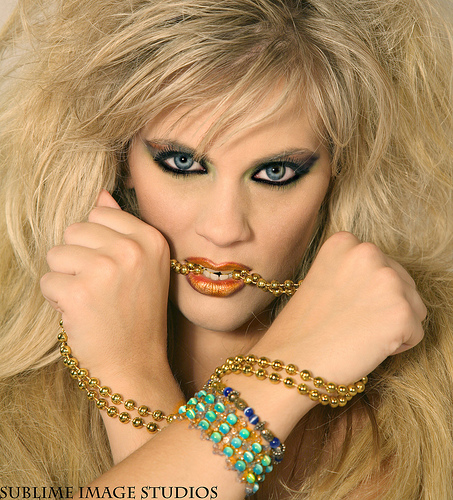

In [79]:
d = dataset_dicts[0]
d.pop('sem_seg_file_name')
img = cv2.imread(d["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=face_land_metadata, scale=0.5)
vis = visualizer.draw_dataset_dict(d)
cv2_imshow(img)